# PythonLab

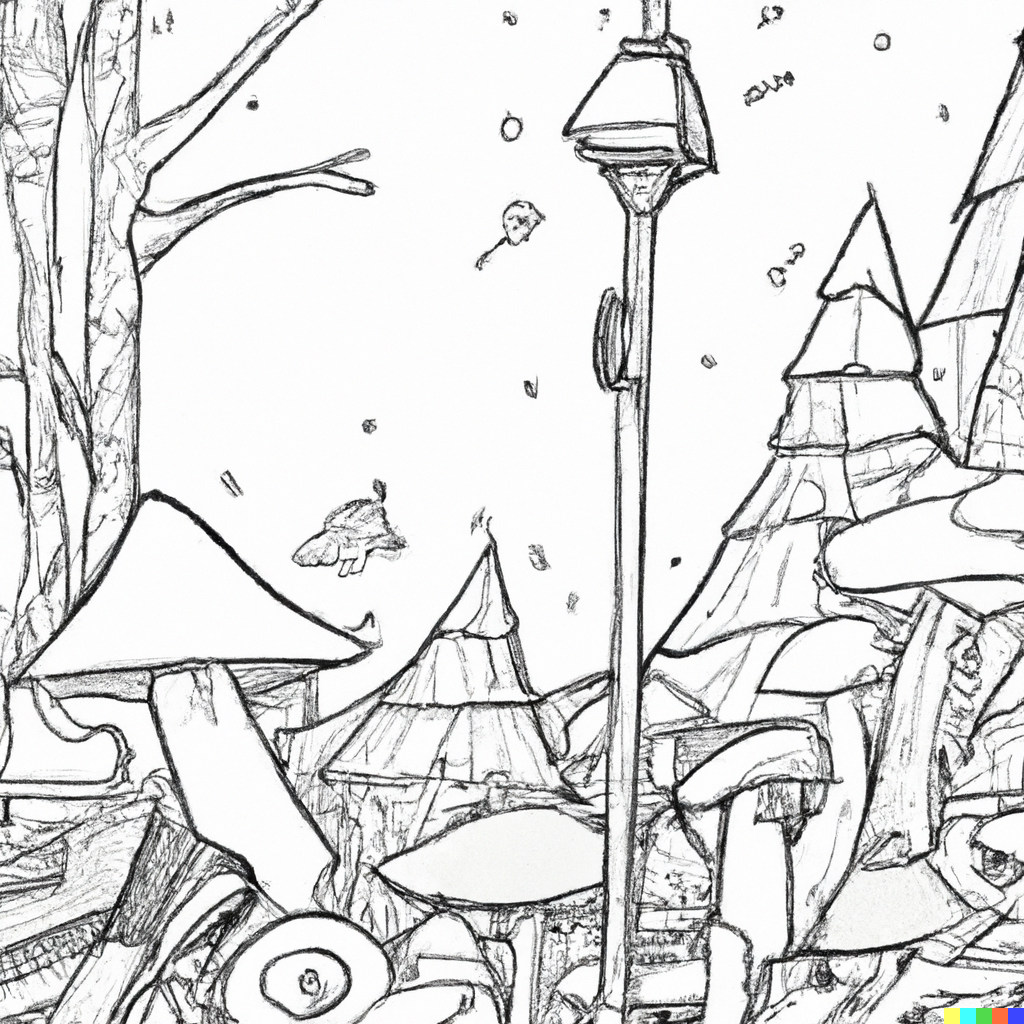

## Random Forests

Random Forests are a popular and powerful machine learning algorithm used for both classification and regression tasks. They belong to the ensemble learning family of algorithms and are known for their versatility and high performance.

Random Forests work by combining multiple decision trees, where each tree is trained on a random subset of the training data. Each tree in the forest independently makes predictions, and the final prediction is determined through a voting or averaging mechanism, depending on the task.

Random Forests offer several advantages. They are robust against overfitting, handle large datasets well, and can handle a mix of categorical and numerical features. They also provide a measure of feature importance, allowing us to understand the impact of different features on the predictions.

However, it's important to note that Random Forests may have limitations in interpretability compared to individual decision trees. Additionally, hyperparameter tuning is necessary to optimize the model's performance.

In this tutorial, we will explore the Random Forests algorithm, learn how to build Random Forests classifiers and regressors, tune hyperparameters for better performance, and understand the concept of feature importance. We will use the popular scikit-learn library in Python to implement Random Forests and apply them to a dataset to solve a classification problem.

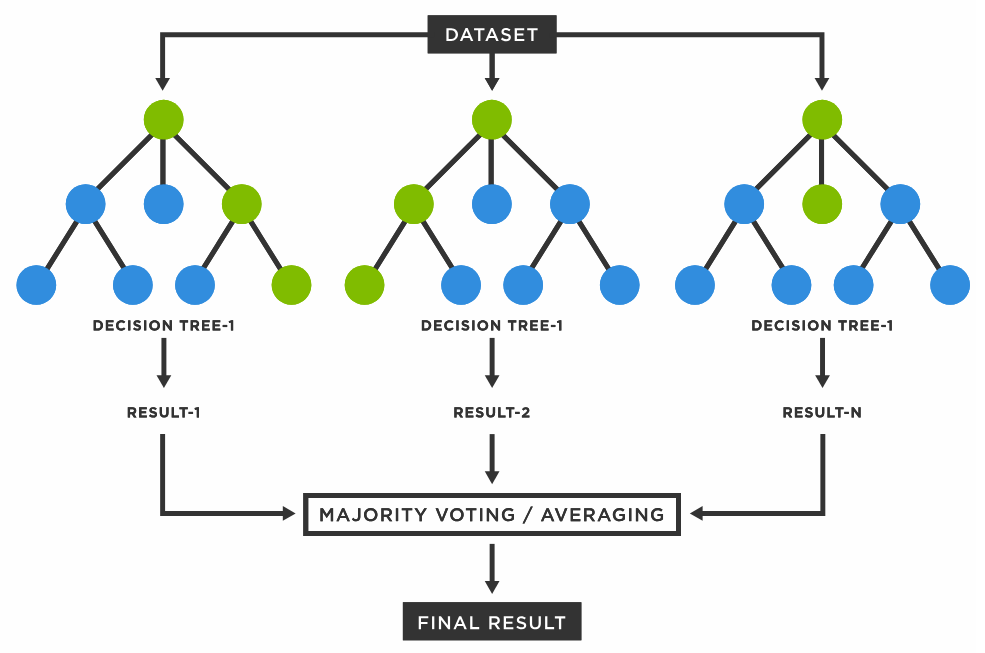

### Random Forest Classifier

The algorithm follows these main steps:

1) **Random Subsampling**: Randomly select a subset of the training data for each tree. This is done by sampling the data with replacement, a process known as bootstrapping. The size of the subset is typically the same as the size of the original dataset, but it may vary.
<br>

2) **Feature Subset Selection**: At each node of the decision tree, only a subset of features is considered for splitting. This helps to introduce randomness and decorrelation among the trees. The number of features to consider at each split is typically a square root or a logarithmic value of the total number of features.
<br>

3) **Growing Decision Trees**: Each tree in the Random Forests algorithm follows the standard decision tree building process. It recursively splits the data based on the selected features and their thresholds, aiming to minimize impurity or maximize information gain.
<br>

4) **Voting or Averaging**: For classification tasks, the final prediction of a Random Forests classifier is determined by majority voting. Each tree in the forest independently predicts the class label, and the class with the most votes becomes the final prediction. For regression tasks, the final prediction is usually the average of the predictions from all trees.
<br>

5) **Ensemble Effect**: The power of Random Forests comes from the ensemble effect, where multiple decision trees are combined to make more accurate predictions. The combination of individual trees reduces overfitting, increases generalization, and improves the overall performance of the model.
<br>

The Random Forests algorithm offers flexibility in controlling the number of trees, the maximum depth of each tree, and other hyperparameters that can be tuned to optimize the model's performance. In the next steps, we will dive deeper into implementing Random Forests using scikit-learn library and explore its applications in classification problems.

Here's an example code snippet that illustrates the process:


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forests classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Let's break down the code:

1) We first import the necessary modules: `RandomForestClassifier` from `sklearn.ensemble`, `load_iris` from `sklearn.datasets`, `train_test_split` from `sklearn.model_selection`, and `accuracy_score` from `sklearn.metrics`.
<br>

2) We load the Iris dataset using `load_iris` and assign the features to `X` and the target labels to `y`.
<br>

3) We split the data into training and testing sets using `train_test_split`. In this example, we allocate 20% of the data for testing, specified by `test_size=0.2`, and set `random_state` for reproducibility.
<br>

4) We create an instance of the Random Forests classifier by initializing `RandomForestClassifier` with `n_estimators=100`, which sets the number of trees in the forest.
<br>

5) We train the classifier on the training data using the `fit` method.
<br>

6) We make predictions on the test set using the `predict` method.
<br>

7) We evaluate the accuracy of the classifier by comparing the predicted labels (`y_pred`) with the true labels (`y_test`) using the `accuracy_score` function.
<br>

8) Finally, we print the accuracy of the classifier.
<br>

By following these steps, you can build a Random Forests classifier and evaluate its performance on your dataset. Feel free to adjust the hyperparameters, such as the number of trees (`n_estimators`), to optimize the model's performance for your specific task.

### Hyperparameter tuning

In this next step, we will explore the process of tuning hyperparameters for a Random Forests classifier. Hyperparameters are parameters that are not learned from the data but are set prior to training the model. Tuning these hyperparameters can significantly impact the performance of the Random Forests classifier.

There are several important hyperparameters to consider when tuning a Random Forests classifier, including:

1) `n_estimators`: This parameter determines the number of trees in the forest. Increasing the number of trees can lead to a more robust and accurate model but also increases computation time.
<br>

2) `max_depth`: This parameter controls the maximum depth of each tree in the forest. A deeper tree can capture more complex relationships in the data but may also lead to overfitting.
<br>

3) `min_samples_split`: This parameter sets the minimum number of samples required to split an internal node. A higher value can prevent overfitting by enforcing more samples per split.
<br>

4) `max_features`: This parameter determines the maximum number of features considered for splitting at each tree node. A smaller value can reduce the model's complexity and potential overfitting.
<br>

To tune these hyperparameters, we can use techniques such as grid search or random search to explore different combinations and find the optimal set of hyperparameters that maximize the model's performance.

Here's an example code snippet that demonstrates how to tune the hyperparameters of a Random Forests classifier using grid search:

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a Random Forests classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy: 0.9666666666666668


### Feature importance

We continue by exploring the concept of feature importance in Random Forests. Feature importance refers to the measure of the contribution of each feature in the model's decision-making process. Understanding feature importance can provide insights into the underlying relationships between the features and the target variable.

Random Forests provide a convenient way to calculate feature importance based on the Gini importance or Mean Decrease Impurity. Gini importance measures the total reduction in impurity achieved by each feature across all trees in the forest. Features that lead to higher impurity reduction are considered more important.

Here's an example code snippet that demonstrates how to calculate and visualize feature importance using a trained Random Forests classifier:

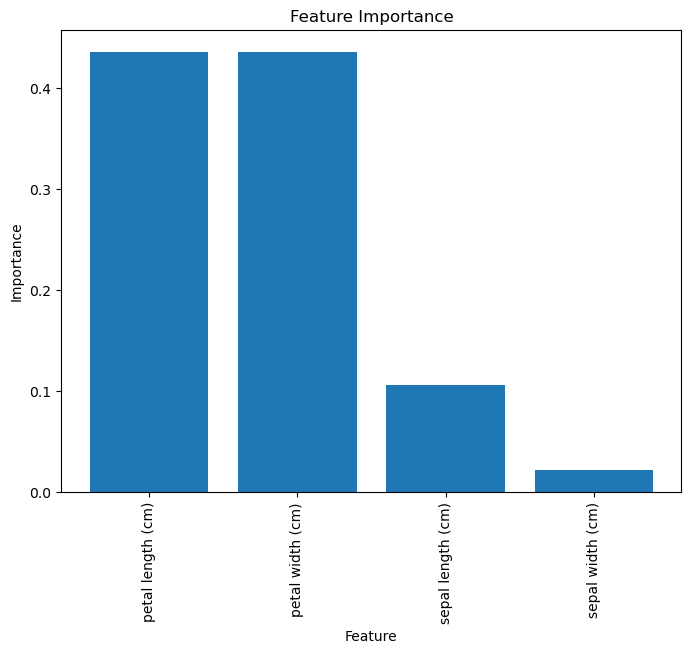

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a Random Forests classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

# Get the feature importances
importances = rf_classifier.feature_importances_
feature_names = iris.feature_names

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

By analyzing the feature importance plot, we can identify the most important features that contribute significantly to the model's predictions. This information can help in feature selection, identifying relevant variables, and gaining insights into the dataset.

### Random Forest Regression

In addition to classification tasks, Random Forests can also be used for regression tasks. Random Forests Regression builds an ensemble of decision trees to predict continuous target variables rather than categorical classes.

The process of using Random Forests for regression is similar to classification. The main difference lies in the way the decision trees make predictions and how the ensemble combines these predictions to form the final regression output.

Here's an example code snippet that demonstrates how to perform Random Forests Regression using the RandomForestRegressor class from scikit-learn:

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y= california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forests regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2553684927247781


In this code snippet:

1) We import the necessary modules: `RandomForestRegressor` from `sklearn.ensemble`, `fetch_california_housing` from `sklearn.datasets`, `train_test_split` from `sklearn.model_selection`, and `mean_squared_error` from `sklearn.metrics`.
<br>

2) We load the California Housing dataset using `fetch_california_housing` and assign the features to `X` and the target variable (house prices) to `y`.
<br>

3) We split the data into training and test sets using `train_test_split`, with 80% of the data for training and 20% for testing.
<br>

4) We create an instance of the Random Forests regressor by initializing `RandomForestRegressor` with `random_state=42`.
<br>

5) We fit the regressor to the training data using the `fit` method.
<br>

6) We make predictions on the test set using the `predict` method.
<br>

7) We evaluate the model's performance using the mean squared error (MSE) metric, which measures the average squared difference between the predicted and actual target values. Lower values of MSE indicate better performance.
<br>

Random Forests Regression can be a powerful technique for predicting continuous variables. By leveraging the ensemble of decision trees, it can capture complex relationships and provide accurate predictions in various regression tasks.

### Conclusion

Congratulations! You have learned the basics of Random Forests in Python using scikit-learn. Here's a summary of what you've covered in this tutorial:

1) **Introduction**: You gained an understanding of Random Forests and their advantages, such as handling complex datasets and providing feature importance. 
<br>

2) **Random Forests Algorithm**: You learned about the key concepts behind Random Forests, including decision trees, bootstrapping, and random feature selection.
<br>

3) **Building a Random Forests Classifier**: You built a Random Forests classifier using scikit-learn, trained it on the Iris dataset, and made predictions.
<br>

4) **Tuning Hyperparameters**: You learned about the importance of hyperparameter tuning and how to use techniques like grid search to find the best parameters for your Random Forests model.
<br>

5) **Feature Importance**: You explored the feature importance of the Random Forests model and visualized it using a bar plot.
<br>

6) **Random Forests Regression**: You had the opportunity to apply Random Forests for regression tasks using the Boston House Prices dataset.
<br>

Throughout this tutorial, you gained hands-on experience and practical knowledge on working with Random Forests in Python. Remember that Random Forests are versatile and powerful machine learning models that can be applied to a wide range of classification and regression problems.

Feel free to experiment further with different datasets, explore more advanced techniques, and continue building your skills in Random Forests and machine learning. Keep practicing, and have fun exploring the exciting world of Random Forests!